In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [5]:
dataset = pd.read_csv('heart_disease_uci.csv')


In [6]:
dataset.head()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [7]:
numeric_cols = dataset.select_dtypes(include=[np.number]).columns
dataset[numeric_cols] = dataset[numeric_cols].fillna(dataset[numeric_cols].mean())  # Mengisi NaN dengan rata-rata kolom


In [8]:
# Mengubah variabel kategori menjadi numerik menggunakan LabelEncoder
le = LabelEncoder()

dataset['sex'] = le.fit_transform(dataset['sex'])
dataset['cp'] = le.fit_transform(dataset['cp'])
dataset['restecg'] = le.fit_transform(dataset['restecg'])
dataset['thal'] = le.fit_transform(dataset['thal'])

# Menampilkan data setelah encoding
print("Data Setelah Encoding:")
print(dataset.head())


Data Setelah Encoding:
   id  age  sex    dataset  cp  trestbps   chol    fbs  restecg  thalch  \
0   1   63    1  Cleveland   3     145.0  233.0   True        0   150.0   
1   2   67    1  Cleveland   0     160.0  286.0  False        0   108.0   
2   3   67    1  Cleveland   0     120.0  229.0  False        0   129.0   
3   4   37    1  Cleveland   2     130.0  250.0  False        1   187.0   
4   5   41    0  Cleveland   1     130.0  204.0  False        0   172.0   

   exang  oldpeak        slope   ca  thal  num  
0  False      2.3  downsloping  0.0     0    0  
1   True      1.5         flat  3.0     1    2  
2   True      2.6         flat  2.0     2    1  
3  False      3.5  downsloping  0.0     1    0  
4  False      1.4    upsloping  0.0     1    0  


In [9]:
# Memilih fitur (variabel independen) dan target (variabel dependen)
x = dataset[['age', 'sex', 'trestbps', 'chol', 'thalch', 'oldpeak']].values  # Fitur
y = dataset['num'].values  # Target

# Menampilkan beberapa data fitur dan target
print("Fitur (5 Data Pertama):")
print(x[:5])
print("Target (5 Data Pertama):")
print(y[:5])


Fitur (5 Data Pertama):
[[ 63.    1.  145.  233.  150.    2.3]
 [ 67.    1.  160.  286.  108.    1.5]
 [ 67.    1.  120.  229.  129.    2.6]
 [ 37.    1.  130.  250.  187.    3.5]
 [ 41.    0.  130.  204.  172.    1.4]]
Target (5 Data Pertama):
[0 2 1 0 0]


In [10]:
# Import library untuk membagi data
from sklearn.model_selection import train_test_split

# Membagi data menjadi data latih dan uji (75% latih, 25% uji)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

# Menampilkan dimensi data latih dan uji
print(f'Data latih: {x_train.shape}, Data uji: {x_test.shape}')


Data latih: (690, 6), Data uji: (230, 6)


In [11]:
# Import StandardScaler untuk normalisasi
from sklearn.preprocessing import StandardScaler

# Normalisasi data fitur
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Menampilkan data setelah normalisasi
print("Data Fitur Setelah Normalisasi (5 Data Pertama):")
print(x_train[:5])


Data Fitur Setelah Normalisasi (5 Data Pertama):
[[ 4.88301980e-01 -1.96447319e+00 -1.30933996e-01 -7.48249511e-03
  -2.79766134e-01 -2.53077145e-01]
 [ 6.22148903e-02  5.09042324e-01 -1.24830439e+00  9.37281534e-02
   1.55498969e-01 -8.21144170e-01]
 [ 8.07867297e-01  5.09042324e-01  9.86436397e-01  4.15762035e-01
  -4.23488047e-02  1.25634206e-01]
 [-1.00300283e+00  5.09042324e-01 -1.30933996e-01  8.48207534e-01
  -1.50642233e+00  1.07241258e+00]
 [ 6.22148903e-02  5.09042324e-01  3.77986238e+00  1.71847294e-03
   1.55498969e-01  1.07241258e+00]]


In [12]:
# Import KNeighborsClassifier dari sklearn
from sklearn.neighbors import KNeighborsClassifier

# Membangun model K-NN
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

# Melatih model dengan data latih
classifier.fit(x_train, y_train)


KNeighborsClassifier()

In [13]:
# Memprediksi hasil pada data uji
y_pred = classifier.predict(x_test)

# Menampilkan hasil prediksi pertama
print("Hasil Prediksi Pertama (5 Data):")
print(y_pred[:5])


Hasil Prediksi Pertama (5 Data):
[0 3 1 0 0]


In [14]:
# Import library untuk evaluasi model
from sklearn.metrics import confusion_matrix, accuracy_score

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy * 100:.2f}%')


Confusion Matrix:
[[82 18  2  4  0]
 [27 28  3  3  1]
 [13 12  3  5  1]
 [ 4  6  3  6  1]
 [ 2  2  3  1  0]]
Akurasi: 51.74%


In [17]:
# Mencari nilai K optimal
from sklearn.metrics import accuracy_score

best_k = 0
best_accuracy = 0

for k in range(1, 21):  # Mencoba nilai K dari 1 hingga 20
    classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k
        y_pred_best_knn = y_pred


print(f'Nilai K terbaik: {best_k}, Akurasi: {best_accuracy * 100:.2f}%')


Nilai K terbaik: 18, Akurasi: 60.00%


In [18]:
cm_best_knn = confusion_matrix(y_test, y_pred_best_knn)
print("Confusion Matrix (K-NN Terbaik):")
print(cm_best_knn)

Confusion Matrix (K-NN Terbaik):
[[95  8  2  1  0]
 [25 33  2  2  0]
 [11 14  5  4  0]
 [ 3 10  2  5  0]
 [ 2  3  1  2  0]]


<ipython-input-19-3de5c7e40b8b>:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


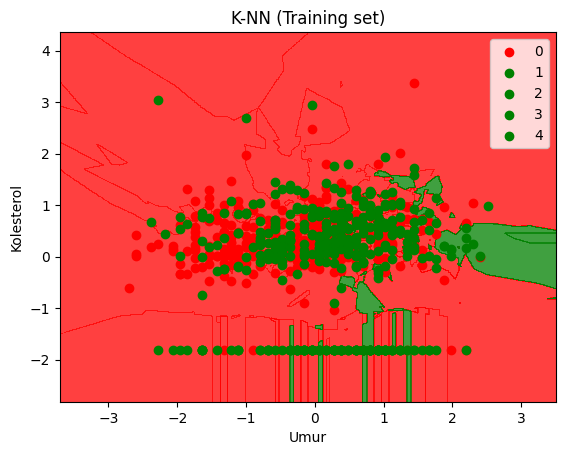

In [19]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np # Importing numpy for np.array and np.meshgrid

# Menggunakan hanya dua fitur untuk visualisasi
x_set, y_set = x_train[:, [0, 3]], y_train  # Contoh: umur dan kolesterol
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))

# Create a new classifier with the desired features for visualization
# and train it with the corresponding subset of features from the training set
classifier_viz = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier_viz.fit(x_set, y_set) # Training with the subset of features


# Plotting decision boundary
# Use classifier_viz for prediction instead of the original classifier
plt.contourf(x1, x2, classifier_viz.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

# Plotting poin data
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('K-NN (Training set)')
plt.xlabel('Umur')
plt.ylabel('Kolesterol')
plt.legend()
plt.show()

<ipython-input-20-d9bc2ad4c1e5>:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


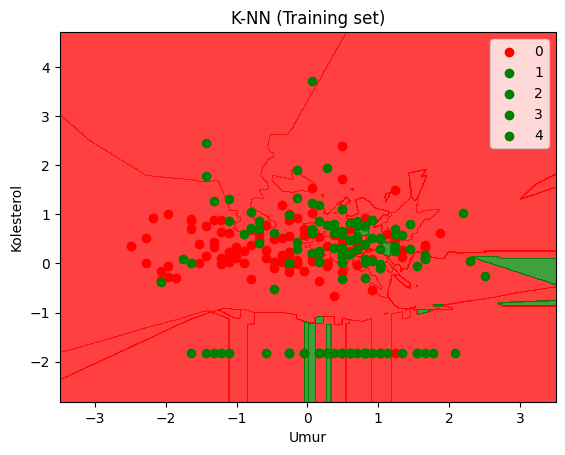

In [20]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np # Importing numpy for np.array and np.meshgrid

# Menggunakan hanya dua fitur untuk visualisasi
x_set, y_set = x_test[:, [0, 3]], y_test  # Contoh: umur dan kolesterol
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))

# Create a new classifier with the desired features for visualization
# and train it with the corresponding subset of features from the training set
classifier_viz = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier_viz.fit(x_set, y_set) # Training with the subset of features


# Plotting decision boundary
# Use classifier_viz for prediction instead of the original classifier
plt.contourf(x1, x2, classifier_viz.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

# Plotting poin data
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('K-NN (Training set)')
plt.xlabel('Umur')
plt.ylabel('Kolesterol')
plt.legend()
plt.show()